In [0]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('diabetes.csv')
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
df.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [4]:
#Check if data is missing
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Outcome,0,0.0
Age,0,0.0
DiabetesPedigreeFunction,0,0.0
BMI,0,0.0
Insulin,0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


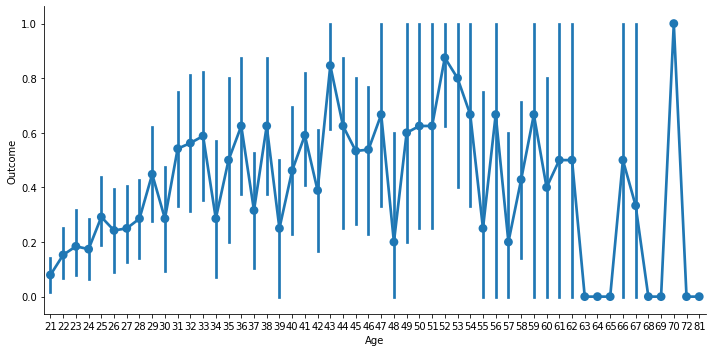

In [5]:
axes = sns.factorplot('Age','Outcome', 
                      data=df, aspect = 2, )

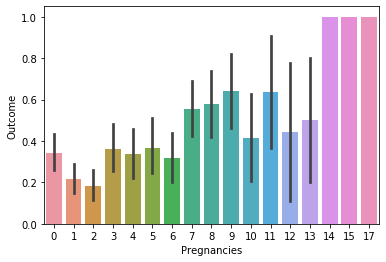

In [6]:
sns.barplot(x='Pregnancies', y='Outcome', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


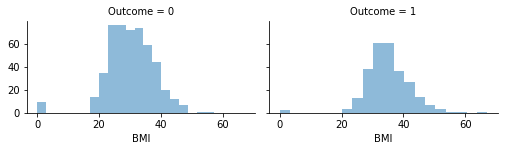

In [7]:
grid = sns.FacetGrid(df, col='Outcome', size=2.2, aspect=1.6)
grid.map(plt.hist, 'BMI', alpha=.5, bins=20)
grid.add_legend();

In [8]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


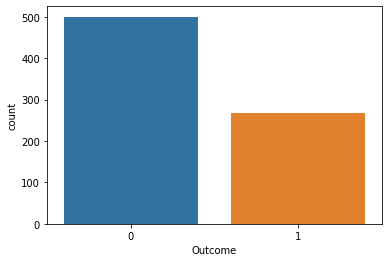

In [9]:
sns.countplot(df['Outcome'],label="Count")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
#Converting to same data type(int)

df['BMI'] = df['BMI'].astype(int)

In [0]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(int)

In [13]:
#Normalizing data such that it is equally distributed

df.loc[ df['Age'] <= 22, 'Age'] = 0
df.loc[(df['Age'] > 22) & (df['Age'] <= 25), 'Age'] = 1
df.loc[(df['Age'] > 25) & (df['Age'] <= 28), 'Age'] = 2
df.loc[(df['Age'] > 28) & (df['Age'] <= 33), 'Age'] = 3
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 4
df.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age'] = 5
df.loc[ df['Age'] > 50, 'Age'] = 6

# let's see how it's distributed
df['Age'].value_counts()

0    135
1    132
5    113
3    107
4    100
2    100
6     81
Name: Age, dtype: int64

In [14]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [15]:
#Normalizing data such that it is equally distributed

df.loc[ df['Glucose'] <= 95, 'Glucose'] = 0
df.loc[(df['Glucose'] > 95) & (df['Glucose'] <= 110), 'Glucose'] = 1
df.loc[(df['Glucose'] > 110) & (df['Glucose'] <= 125), 'Glucose'] = 2
df.loc[(df['Glucose'] > 125) & (df['Glucose'] <= 150), 'Glucose'] = 3
df.loc[(df['Glucose'] > 150) & (df['Glucose'] <= 200), 'Glucose'] = 4

# let's see how it's distributed
df['Glucose'].value_counts()

1    160
0    160
3    157
2    151
4    140
Name: Glucose, dtype: int64

In [16]:
df['BloodPressure'].describe()


count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [17]:
df.loc[ df['BloodPressure'] <= 54, 'BloodPressure'] = 0
df.loc[(df['BloodPressure'] > 54) & (df['BloodPressure'] <= 60), 'BloodPressure'] = 1
df.loc[(df['BloodPressure'] > 60) & (df['BloodPressure'] <= 65), 'BloodPressure'] = 2
df.loc[(df['BloodPressure'] > 65) & (df['BloodPressure'] <= 69), 'BloodPressure'] = 3
df.loc[(df['BloodPressure'] > 69) & (df['BloodPressure'] <= 72), 'BloodPressure'] = 4
df.loc[(df['BloodPressure'] > 72) & (df['BloodPressure'] <= 77), 'BloodPressure'] = 5
df.loc[(df['BloodPressure'] > 77) & (df['BloodPressure'] <= 80), 'BloodPressure'] = 6
df.loc[(df['BloodPressure'] > 80) & (df['BloodPressure'] <= 87), 'BloodPressure'] = 7
df.loc[(df['BloodPressure'] > 87) & (df['BloodPressure'] <= 122), 'BloodPressure'] = 8

df['BloodPressure'].value_counts()

4    101
5     99
0     86
8     85
6     85
2     85
7     80
3     75
1     72
Name: BloodPressure, dtype: int64

In [18]:
df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [19]:
df.loc[ df['SkinThickness'] <= 5, 'SkinThickness'] = 0
df.loc[(df['SkinThickness'] > 5) & (df['SkinThickness'] <= 25), 'SkinThickness'] = 1
df.loc[(df['SkinThickness'] > 25) & (df['SkinThickness'] <= 33), 'SkinThickness'] = 2
df.loc[(df['SkinThickness'] > 33) & (df['SkinThickness'] <= 100), 'SkinThickness'] = 3

df['SkinThickness'].value_counts()

0    227
1    200
2    173
3    168
Name: SkinThickness, dtype: int64

In [20]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [21]:
df.loc[ df['Insulin'] <= 1, 'Insulin'] = 0
df.loc[(df['Insulin'] > 1), 'Insulin'] = 1

df['Insulin'].value_counts()

1    394
0    374
Name: Insulin, dtype: int64

In [22]:
df['BMI'].describe()

count    768.000000
mean      31.548177
std        7.860602
min        0.000000
25%       27.000000
50%       32.000000
75%       36.000000
max       67.000000
Name: BMI, dtype: float64

In [23]:
df.loc[ df['BMI'] <= 23, 'BMI'] = 0
df.loc[(df['BMI'] > 23) & (df['BMI'] <= 26), 'BMI'] = 1
df.loc[(df['BMI'] > 26) & (df['BMI'] <= 28), 'BMI'] = 2
df.loc[(df['BMI'] > 28) & (df['BMI'] <= 30), 'BMI'] = 3
df.loc[(df['BMI'] > 30) & (df['BMI'] <= 32), 'BMI'] = 4
df.loc[(df['BMI'] > 32) & (df['BMI'] <= 34), 'BMI'] = 5
df.loc[(df['BMI'] > 34) & (df['BMI'] <= 37), 'BMI'] = 6
df.loc[(df['BMI'] > 37) & (df['BMI'] <= 41), 'BMI'] = 7
df.loc[(df['BMI'] > 41) & (df['BMI'] <= 67), 'BMI'] = 8

df['BMI'].value_counts()

6    98
1    98
5    91
4    86
0    85
3    83
2    77
8    75
7    75
Name: BMI, dtype: int64

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3,4,3,0,5,0,5,1
1,1,0,3,2,0,1,0,3,0
2,8,4,2,0,0,0,0,3,1
3,1,0,3,1,1,2,0,0,0
4,0,3,0,3,1,8,2,3,1


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [0]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [30]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [0]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [37]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [38]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.83,Random Forest
99.83,Decision Tree
80.56,KNN
77.43,Support Vector Machines
77.43,Logistic Regression
73.26,Naive Bayes
65.10,Perceptron
63.72,Stochastic Gradient Decent
